# Environment Setup / Package Installation

In [7]:
!pip install -U sweetviz==1.0beta6

     |████████████████████████████████| 325 kB 16.6 MB/s 


In [ ]:
!pip install -U plotly==4.10.0

In [ ]:
!pip install -U yellowbrick==1.3.post1

In [1]:
# Python libraries
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)


# Time
from contextlib import contextmanager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

# Data Loading and Preprocessing

In [3]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [3]:
diabetes_df = pd.read_csv('diabetes.csv')
original_df = diabetes_df.copy(deep=True)

# Summary Statistics and Reports

In [59]:
print("Data row and column dimensions:")
print("")
print(original_df.shape)
print("")

# Class Distribution
tot = 768
class_counts = original_df.groupby('Outcome').size()/tot*100
class_pct = class_counts.map('{:,.2f}%'.format)
print("Distribution of pre-diabetes: ", class_counts)
print("")

# Descriptives
print("Descriptive distributions:")
print("")
print(original_df.describe())
print("")

# Examine skew of the attribute distributions
skew = original_df.skew()
print("Skew of attributes:")
print("")
print(skew)
print("")



Data row and column dimensions:

(768, 9)

Distribution of pre-diabetes:  Outcome
0    65.104167
1    34.895833
dtype: float64

Descriptive distributions:

       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]

Skew of attributes:

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
A

In [4]:
display(diabetes_df.info(),diabetes_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

In [6]:
diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [7]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(diabetes_df)
#display the report
advert_report.show_html('diabetes.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report diabetes.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# Univariate Analysis (Distributions)

In [5]:
def median_target(var):   
    temp = diabetes_df[diabetes_df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [6]:
# 2 datasets
diabetic = original_df[(original_df['Outcome'] != 0)]
nondiabetic = original_df[(original_df['Outcome'] == 0)]

In [7]:
def plot_distribution(selected_data, size_bin) :  
    tmp1 = diabetic[selected_data]
    tmp2 = nondiabetic[selected_data]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['diabetic', 'non-diabetic']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    fig.show()
    fig['layout'].update(title = selected_data)

    py.iplot(fig, filename = 'Density plot')
    

In [8]:
plot_distribution('Insulin', 0)

In [9]:
median_target('Insulin')

Outcome  Insulin
0        0       39
1        1        0

In [10]:
diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['Insulin'].isnull()), 'Insulin'] = 102.5
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['Insulin'].isnull()), 'Insulin'] = 169.5

In [11]:
plot_distribution('Glucose', 0)

In [12]:
median_target('Glucose')

Outcome  Glucose
0        0      107
1        1      140

In [13]:
diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['Glucose'].isnull()), 'Glucose'] = 107
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['Glucose'].isnull()), 'Glucose'] = 140

In [14]:
plot_distribution('SkinThickness', 10)

In [15]:
median_target('SkinThickness')

Outcome  SkinThickness
0        0             21
1        1             27

In [16]:
diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['SkinThickness'].isnull()), 'SkinThickness'] = 27
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['SkinThickness'].isnull()), 'SkinThickness'] = 32

In [17]:
plot_distribution('BloodPressure', 5)

In [18]:
median_target('BloodPressure')

Outcome  BloodPressure
0        0             70
1        1             74

In [19]:
diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['BloodPressure'].isnull()), 'BloodPressure'] = 70
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [20]:
plot_distribution('BMI', 0)

In [21]:
median_target('BMI')


Outcome    BMI
0        0  30.05
1        1  34.25

In [22]:
diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['BMI'].isnull()), 'BMI'] = 30.1
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['BMI'].isnull()), 'BMI'] = 34.3

In [28]:
import sweetviz as sv
# analyzing the dataset after replacement of missing values 
report = sv.analyze(diabetes_df)
# display the report
report.show_html('diabetes_after.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report diabetes_after.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Box Plots

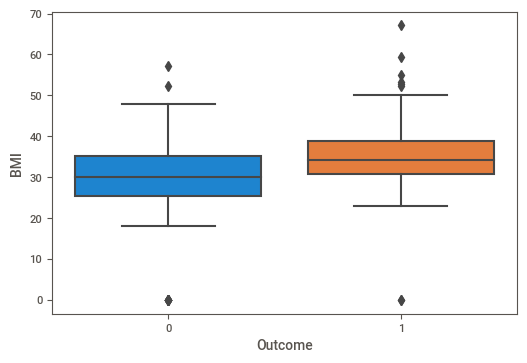

In [30]:
sns.boxplot(y='BMI',x='Outcome', data=diabetes_df)
plt.show()

## Violin Plots

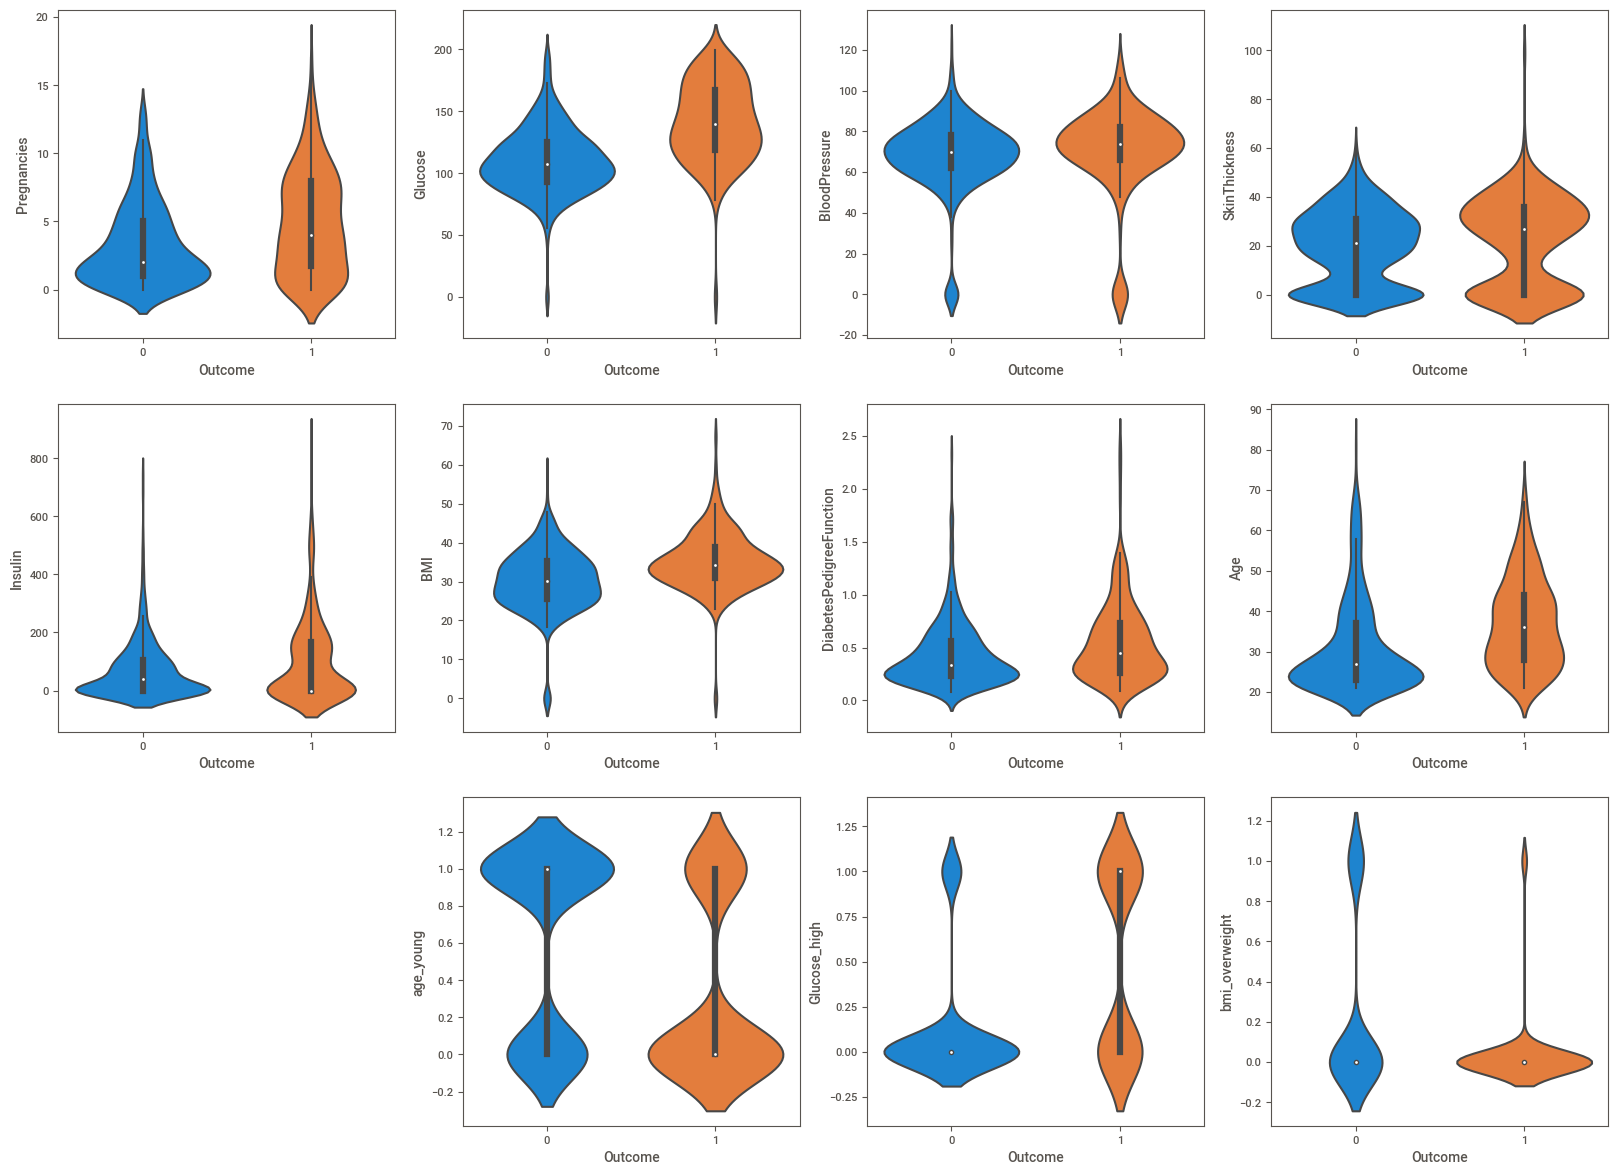

In [31]:
plt.figure(figsize=(20, 20))

for column_index, column in enumerate(diabetes_df.columns):
    if column == 'Outcome':
        continue
    plt.subplot(4, 4, column_index + 1)
    sns.violinplot(x='Outcome', y=column,  data=diabetes_df)

# Cross Tabulation and Pivot Tables

In [23]:
# Age < 30 is young
diabetes_df['age_young'] = diabetes_df['Age'].apply(lambda x: 1 if x < 30 else 0)
age_y_counts = diabetes_df.groupby('age_young').size()

In [24]:
from pandas import  crosstab, pivot_table, set_option

crosstab(diabetes_df['Outcome'],[diabetes_df['age_young']],normalize='columns')

age_young         0         1
Outcome                      
0          0.505376  0.787879
1          0.494624  0.212121

In [25]:
diabetes_df['Glucose_high'] = diabetes_df['Glucose'].apply(lambda x: 0 if x < 140 else 1)
glucose_high_counts = diabetes_df.groupby('Glucose_high').size()
crosstab(diabetes_df['Outcome'],[diabetes_df['age_young'], diabetes_df['Glucose_high']],normalize='columns')

age_young            0                   1          
Glucose_high         0         1         0         1
Outcome                                             
0             0.632231  0.269231  0.866261  0.402985
1             0.367769  0.730769  0.133739  0.597015

In [26]:
# BMI overweight >= 25 & < 30
diabetes_df['bmi_overweight'] = diabetes_df['BMI'].apply(lambda x: 1 if 25 >= x < 30 else 0)
bmi_overweight_counts = diabetes_df.groupby('bmi_overweight').size()
crosstab(diabetes_df['Outcome'],[diabetes_df['age_young'], diabetes_df['Glucose_high'],diabetes_df['bmi_overweight'] ],normalize='columns')

age_young              0                      ...         1            
Glucose_high           0                   1  ...         0      1     
bmi_overweight         0         1         0  ...         1      0    1
Outcome                                       ...                      
0               0.582524  0.916667  0.262295  ...  0.986842  0.375  1.0
1               0.417476  0.083333  0.737705  ...  0.013158  0.625  0.0

[2 rows x 8 columns]

In [ ]:


# Create indicators for pre-diabetes to determine the size of the sample at risk 

# Age < 30 is young
original_df['age_young'] = original_df['Age'].apply(lambda x: 1 if x < 30 else 0)
age_y_counts = original_df.groupby('age_young').size()

# Plasma Glucose >= 140
#data['gluc_h'] = [0 if i < 140 else 1 for i in data['gluc']]
original_df['glucose_high'] = original_df['Glucose'].apply(lambda x: 0 if x < 140 else 1)
gluc_h_counts = original_df.groupby('glucose_high').size()

# Serum Insulin >= 166
#data['insul_h'] = [0 if i < 166 else 1 for i in data['insul']]
original_df['insul_high'] = original_df['Insulin'].apply(lambda x: 0 if x < 140 else 1)
insul_h_counts = original_df.groupby('insul_high').size()
    
# Diastolic BP >= 85
original_df['bloodpressure_high'] = original_df['BloodPressure'].apply(lambda x: 0 if x < 85 else 1)
dbp_h_counts = original_df.groupby('bloodpressure_high').size()

# Pedigree function >= .6
original_df['dbf_high'] = original_df['DiabetesPedigreeFunction'].apply(lambda x: 0 if x < .6 else 1)
pedi_h_counts = original_df.groupby('dbf_high').size()

# Triceps Skin Fold Thickness >= 27
original_df['skinthickness_high'] = original_df['SkinThickness'].apply(lambda x: 0 if x < 26 else 1)
skin_h_counts = original_df.groupby('skinthickness_high').size()

# BMI overweight >= 25 & < 30
original_df['bmi_overweight'] = original_df['BMI'].apply(lambda x: 1 if 25 >= x < 30 else 0)
bmi_ov_counts = original_df.groupby('bmi_overweight').size()

# BMI overweight obese >=30
original_df['bmi_obese'] = original_df['BMI'].apply(lambda x: 1 if 30 >= x else 0)
bmi_ob_counts = original_df.groupby('bmi_obese').size()

factors = original_df.loc[:, 'Outcome':'bmi_obese'] # 'age_y', 'gluc_h', 'insul_h', 'dbp_h', 'pedi_h', 'skin_h', 'bmi_ob']

print("Descriptive statistics on cases at risk for pre-diabetes in the sample")
print("")
# SUB GROUP ANALYSIS
crosstab(original_df['Outcome'],[original_df['age_young'], original_df['bmi_obese'], original_df['skinthickness_high'], original_df['glucose_high']],normalize='columns')

Descriptive statistics on cases at risk for pre-diabetes in the sample



age_young                  0                                                  \
bmi_obese                  0                                     1             
skinthickness_high         0                   1                 0             
glucose_high               0         1         0        1        0         1   
Outcome                                                                        
0                   0.587302  0.186047  0.518987  0.22807  0.74026  0.409091   
1                   0.412698  0.813953  0.481013  0.77193  0.25974  0.590909   

age_young                                   1                           \
bmi_obese                                   0                            
skinthickness_high         1                0                   1        
glucose_high               0      1         0         1         0    1   
Outcome                                                                  
0                   0.782609  0.625  0.754098  0.333333  0.809091  0.3   
1                   0.217391  0.375  0.245902  0.666667  0.190909  0.7   

age_young                                          
bmi_obese                  1                       
skinthickness_high         0              1        
glucose_high               0         1    0     1  
Outcome                                            
0                   0.956522  0.727273  0.9  0.75  
1                   0.043478  0.272727  0.1  0.25

In [ ]:
# SUB GROUP ANALYSIS - pedigree function with age, insulin, and glucose levels
crosstab(original_df['Outcome'],[original_df['age_young'],original_df['insul_high']],normalize='columns')

age_young          0                   1          
insul_high         0         1         0         1
Outcome                                           
0           0.568421  0.298851  0.812903  0.697674
1           0.431579  0.701149  0.187097  0.302326

In [ ]:
# SUB GROUP ANALYSIS - pedigree function with age, insulin, and glucose levels
crosstab(original_df['Outcome'],[original_df['age_young'],original_df['insul_high'],original_df['dbf_high'],original_df['glucose_high']],normalize='columns')

age_young            0                                                   \
insul_high           0                                 1                  
dbf_high             0              1                  0              1   
glucose_high         0         1    0         1        0         1    0   
Outcome                                                                   
0             0.701987  0.344828  0.6  0.142857  0.52381  0.137931  0.2   
1             0.298013  0.655172  0.4  0.857143  0.47619  0.862069  0.8   

age_young                      1                                           \
insul_high                     0                              1             
dbf_high                       0          1                   0             
glucose_high         1         0    1     0         1         0         1   
Outcome                                                                     
0             0.363636  0.882883  0.4  0.84  0.307692  0.897436  0.470588   
1             0.636364  0.117117  0.6  0.16  0.692308  0.102564  0.529412   

age_young                         
insul_high                        
dbf_high             1            
glucose_high         0         1  
Outcome                           
0             0.666667  0.416667  
1             0.333333  0.583333

In [ ]:
# SUB GROUP ANALYSIS - pedigree function with age, insulin, and glucose levels
crosstab(original_df['Outcome'],[original_df['age_young'],original_df['dbf_high']],normalize='columns')

age_young         0                   1          
dbf_high          0         1         0         1
Outcome                                          
0          0.544402  0.415929  0.821782  0.677419
1          0.455598  0.584071  0.178218  0.322581

# Multivariate Analysis

## Pair Plots

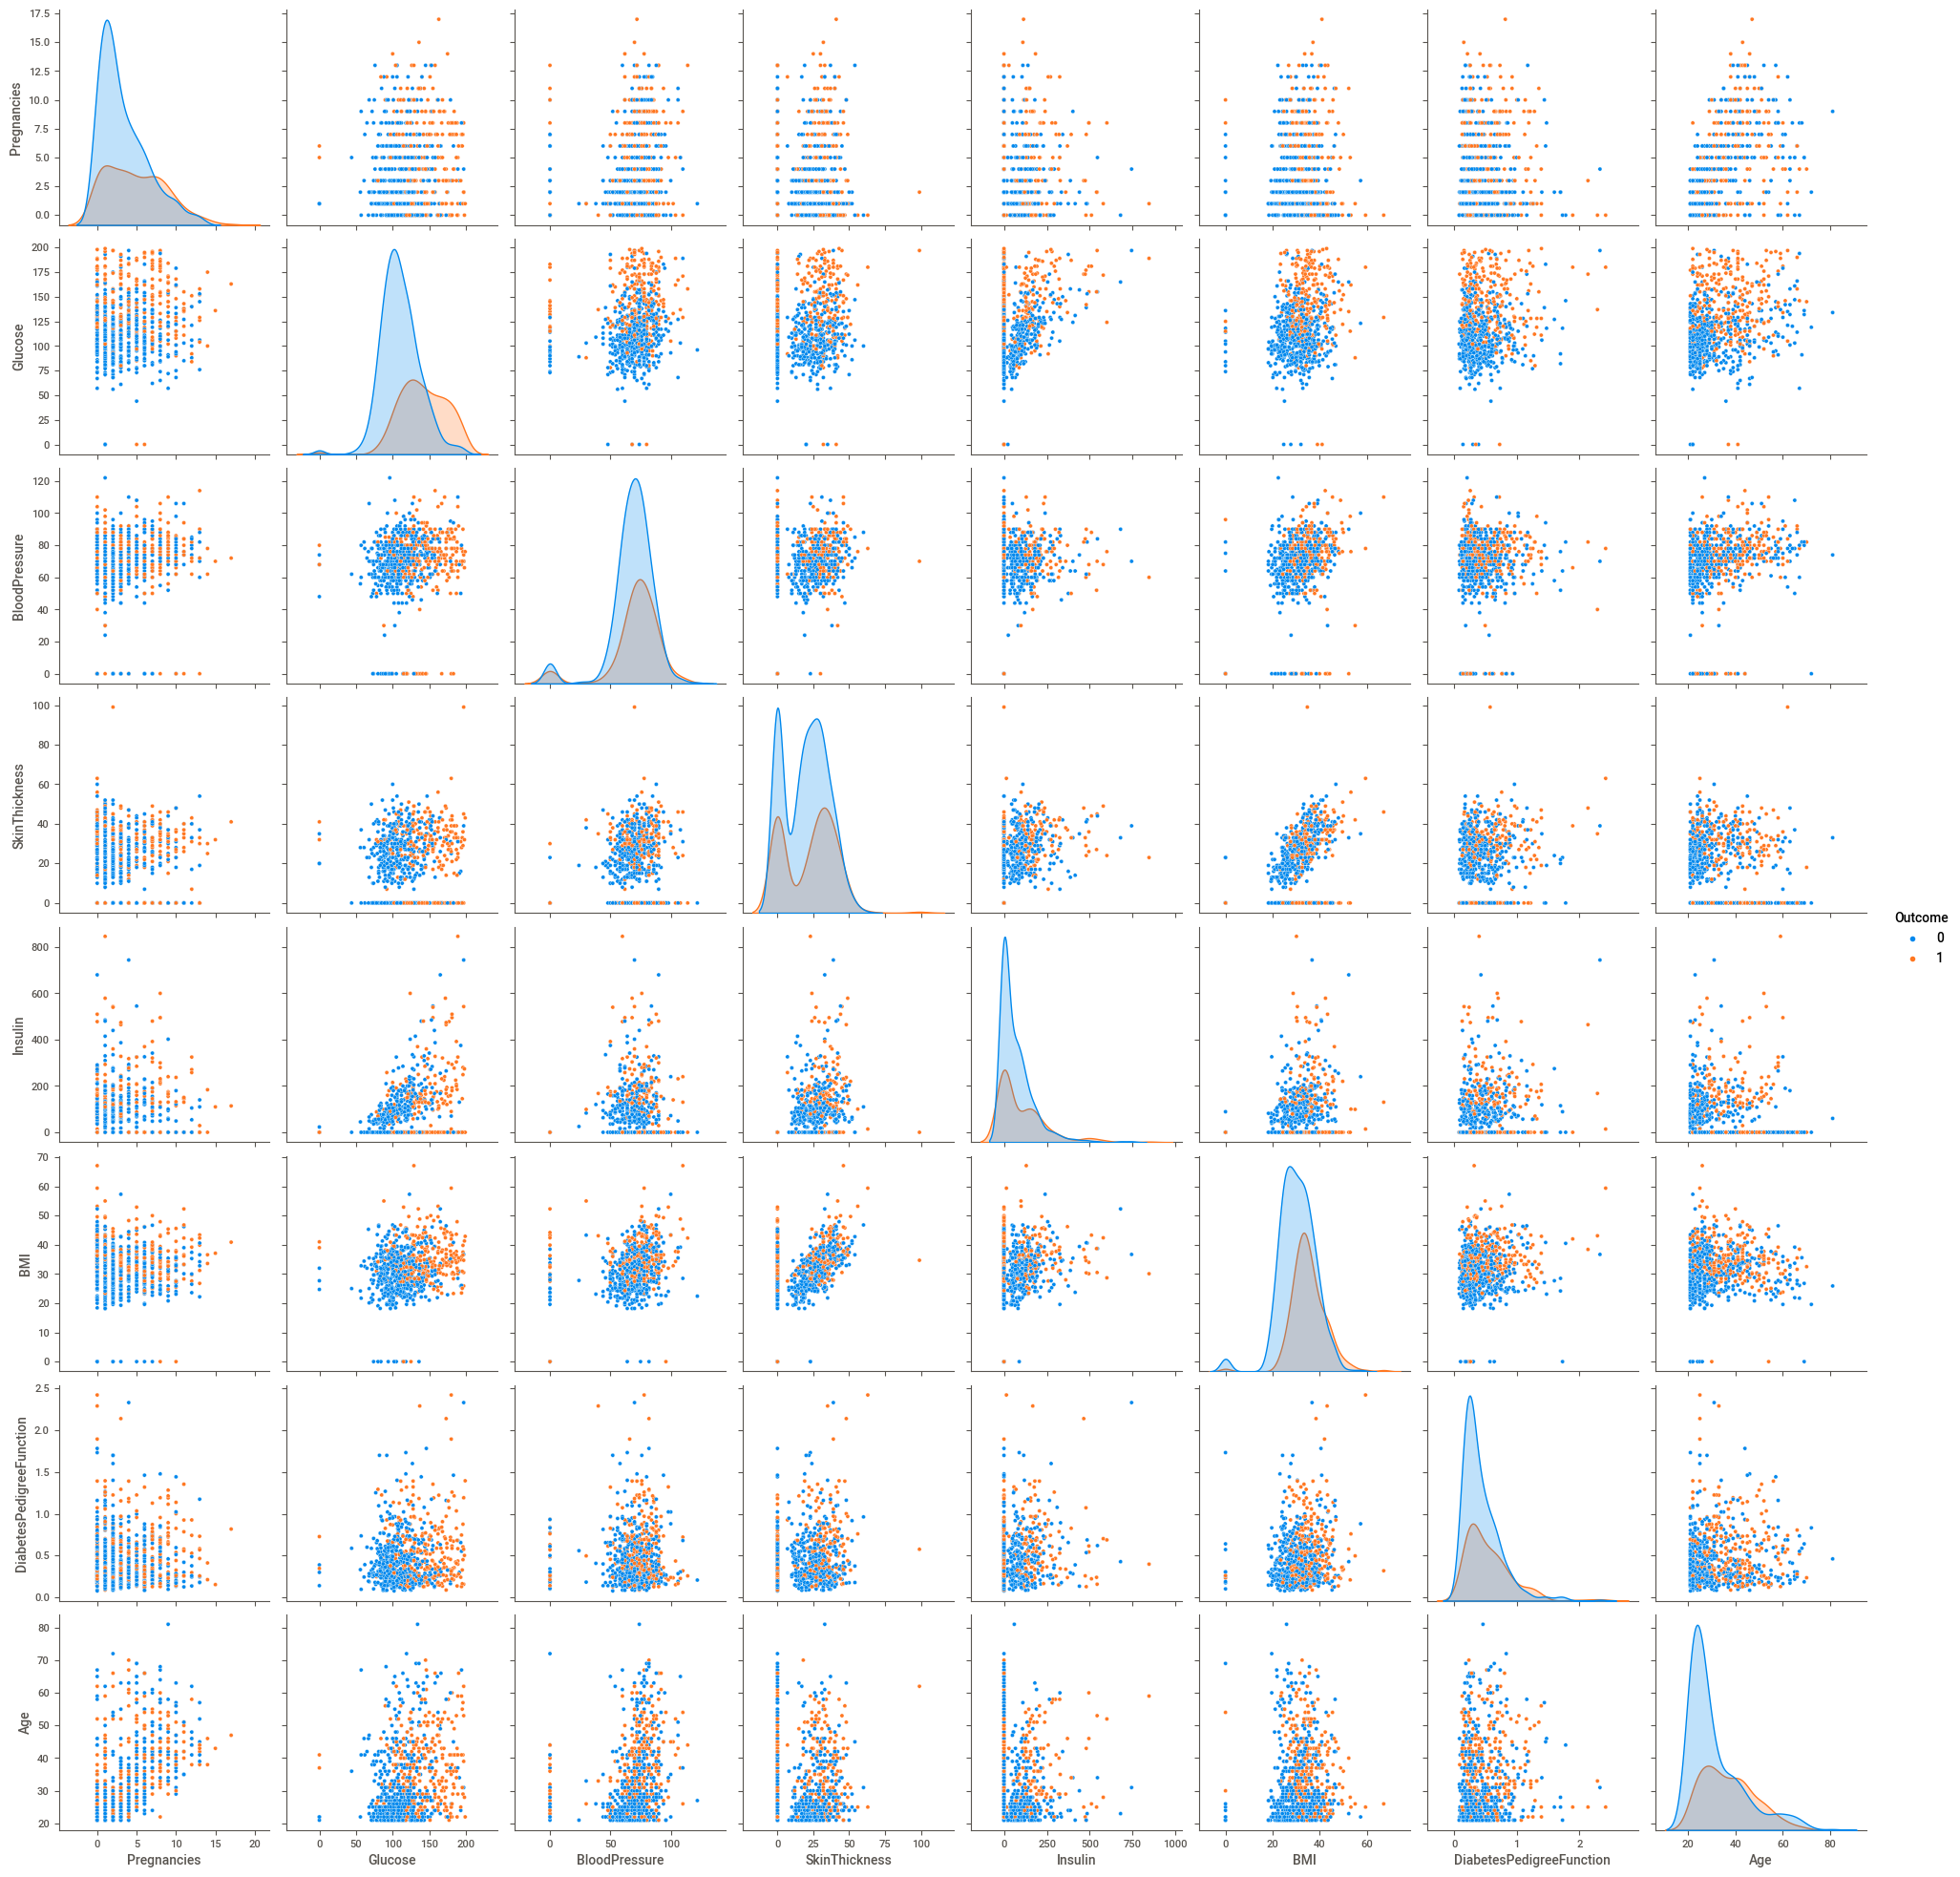

In [29]:
#sns.set_style('whitegrid')
sns.pairplot(original_df,hue='Outcome')

## Joint Plots

In [32]:
diabetic_only = diabetes_df.loc[diabetes_df['Outcome'] == 1]

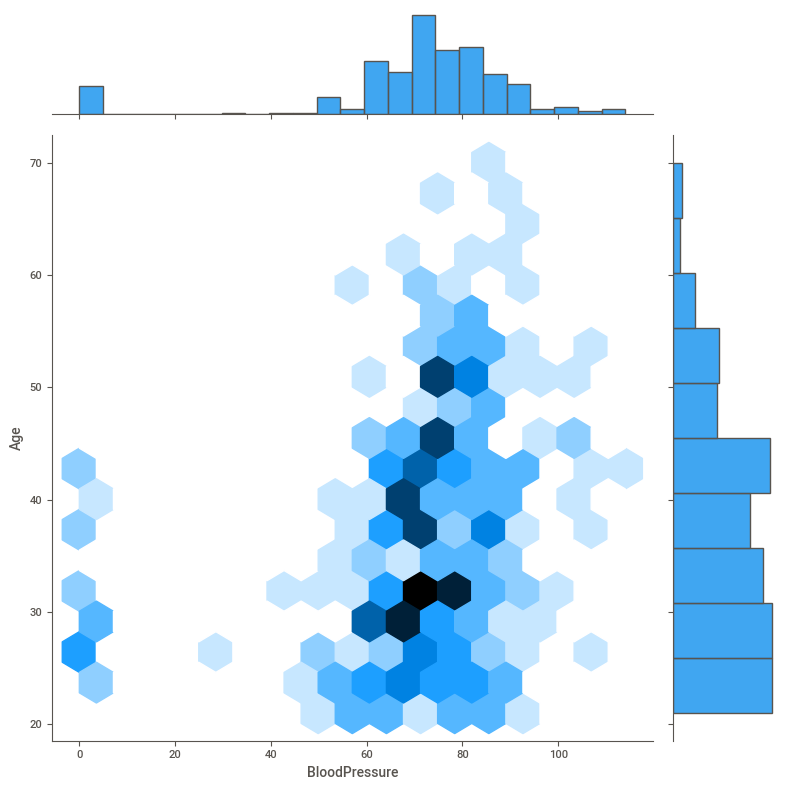

In [33]:
sns.jointplot(data=diabetic_only, y="Age", x="BloodPressure", kind="hex", height = 8)
plt.show()

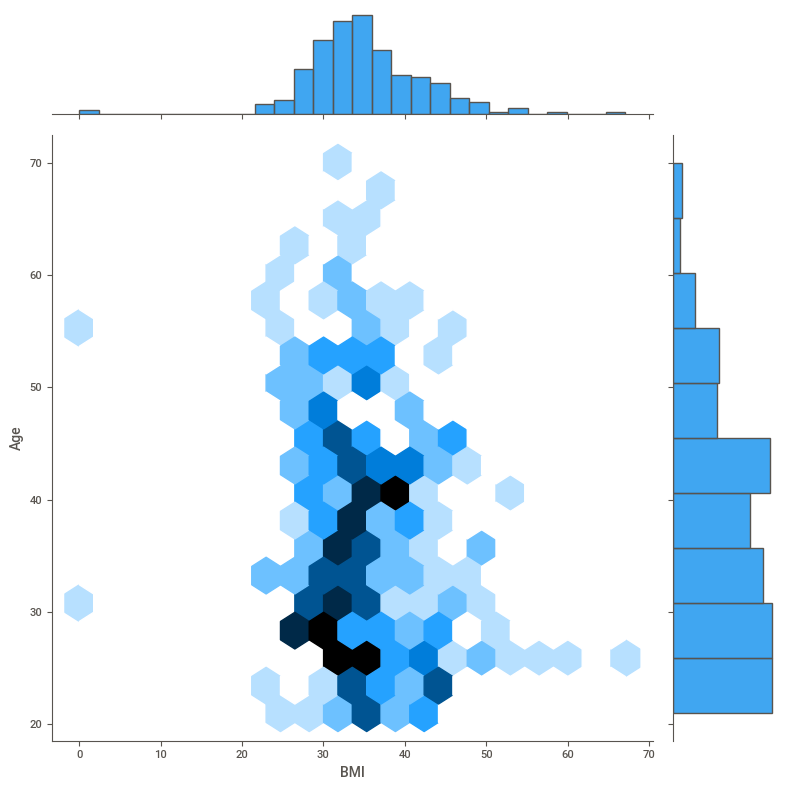

In [34]:
sns.jointplot(data=diabetic_only, y="Age", x="BMI", kind="hex", height = 8)
plt.show()



## Correlation Plots




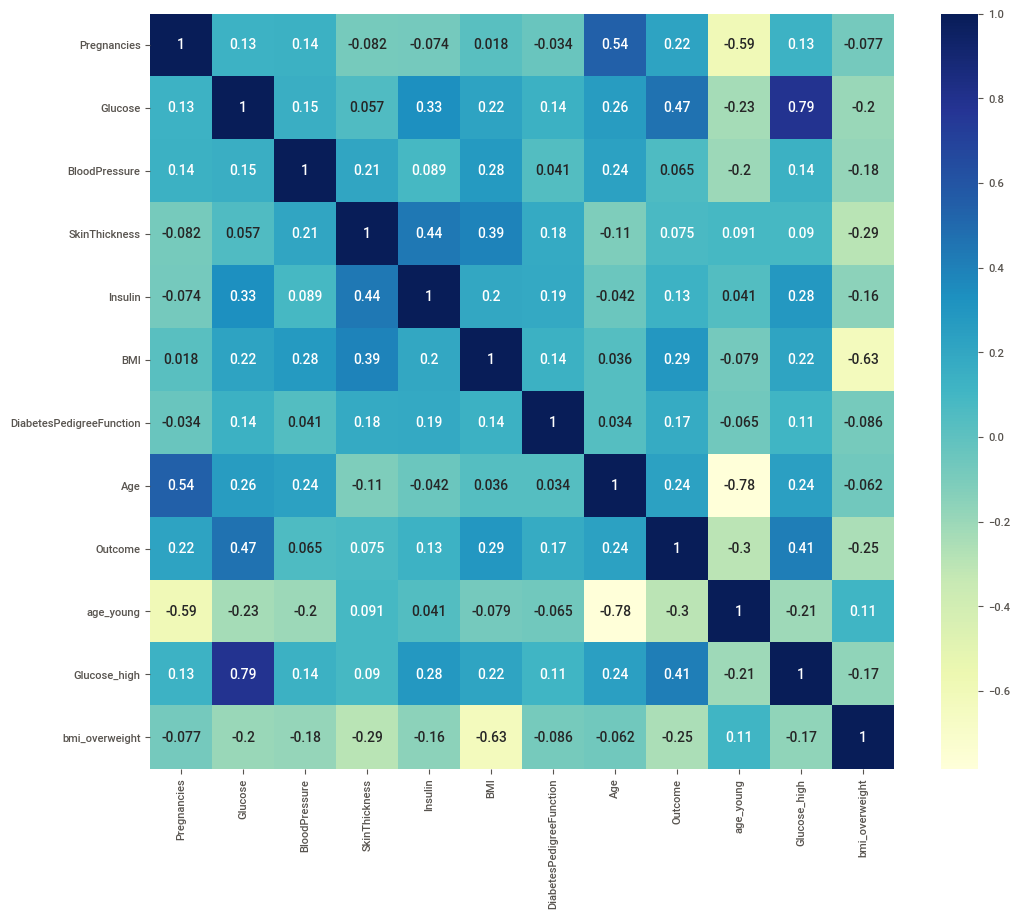

In [35]:
corr = diabetes_df.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr,cmap="YlGnBu", annot=True);

## Parallel Coordinates Plots

In [36]:
# Def X and Y
X = diabetes_df.drop('Outcome', 1)
y = diabetes_df['Outcome']

In [37]:
from yellowbrick.features import ParallelCoordinates


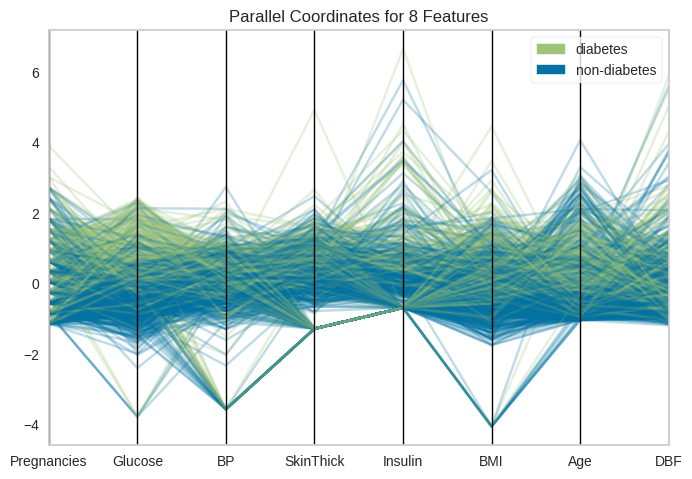

In [38]:

# Specify the features of interest and the classes of the target
features = [
    "Pregnancies","Glucose","BP","SkinThick","Insulin","BMI","Age", "DBF"
]
classes = ["non-diabetes", "diabetes"]

X_subset = X[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","Age","DiabetesPedigreeFunction"]]
# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard',  shuffle=True,
)

# Fit the visualizer and display it
visualizer.fit_transform(X_subset, y)
visualizer.show()

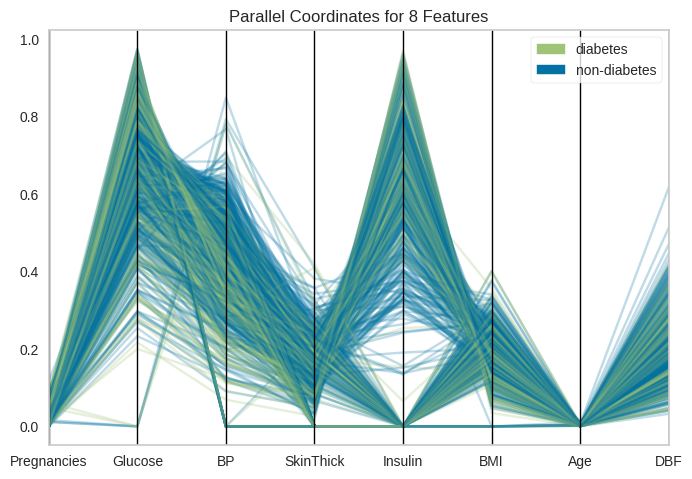

In [39]:
# Specify the features of interest and the classes of the target
features = [
    "Pregnancies","Glucose","BP","SkinThick","Insulin","BMI","Age", "DBF"
]
classes = ["non-diabetes", "diabetes"]

X_subset = X[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
## Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='l2',  shuffle=True,
)

# Fit the visualizer and display it
visualizer.fit_transform(X_subset, y)
visualizer.show()

## Radial Visualization Plots

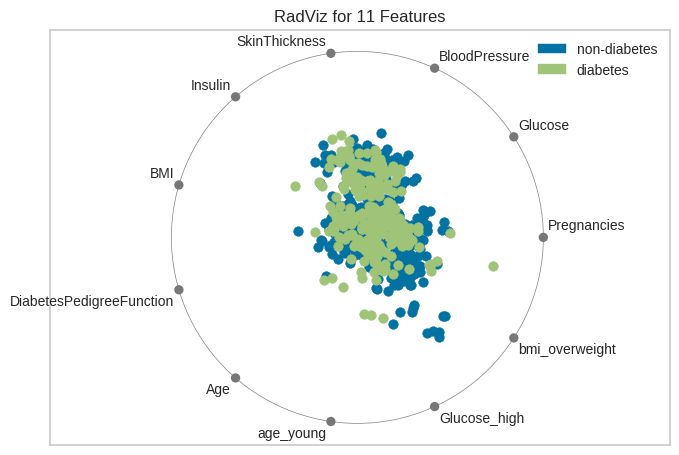

In [40]:
from yellowbrick.features import RadViz



# Instantiate the visualizer
visualizer = RadViz(classes=classes)

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()

## Rank 1D and 2D Plots

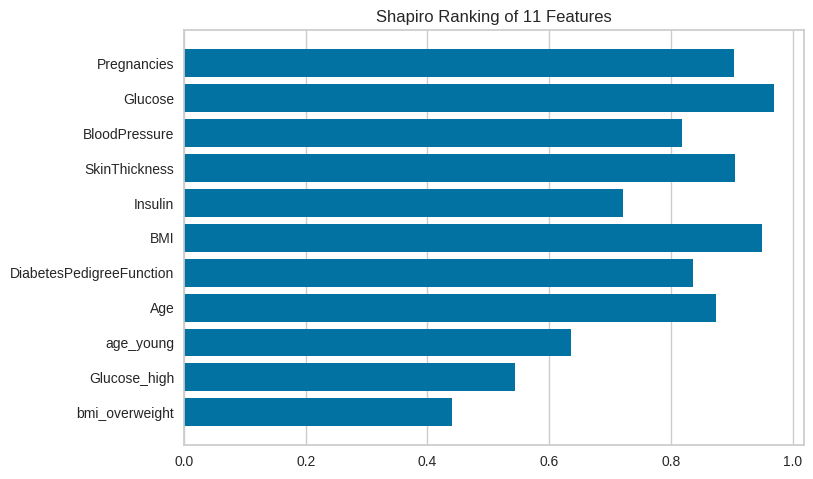

In [41]:
from yellowbrick.features import Rank1D



# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

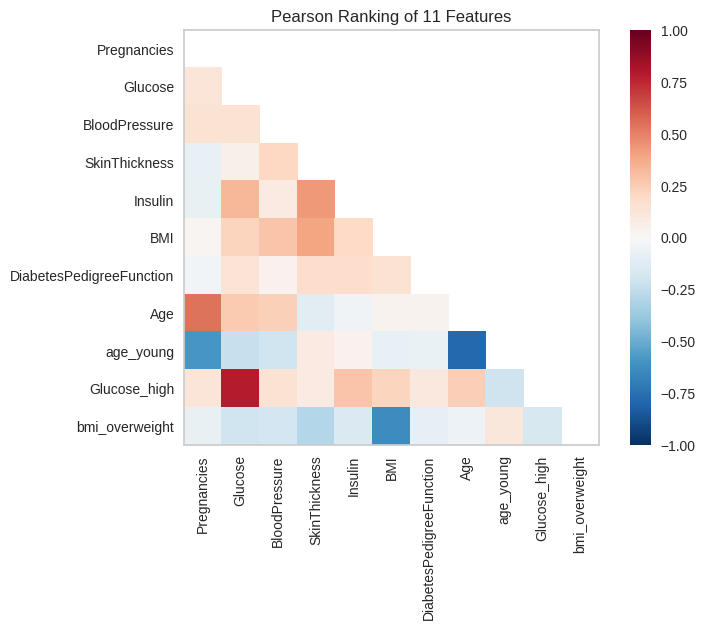

In [42]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

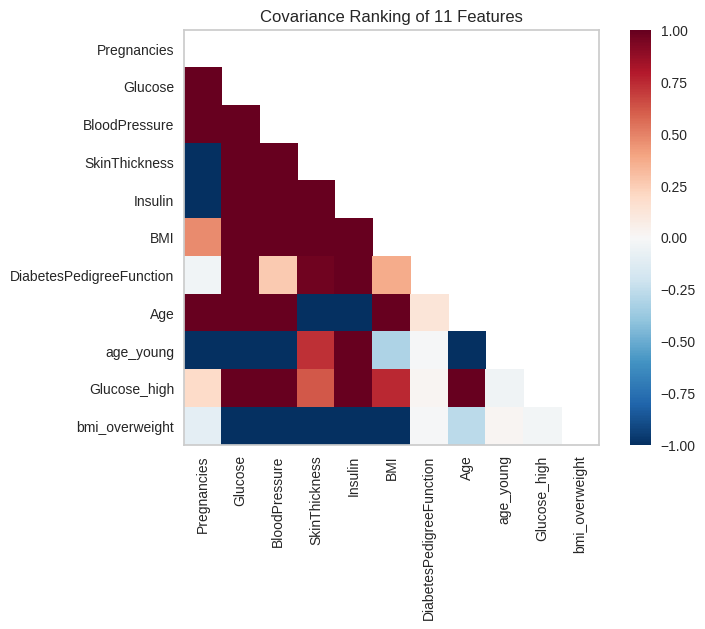

In [43]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the covariance ranking algorithm
visualizer = Rank2D(algorithm='covariance')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

## Projection using PCA

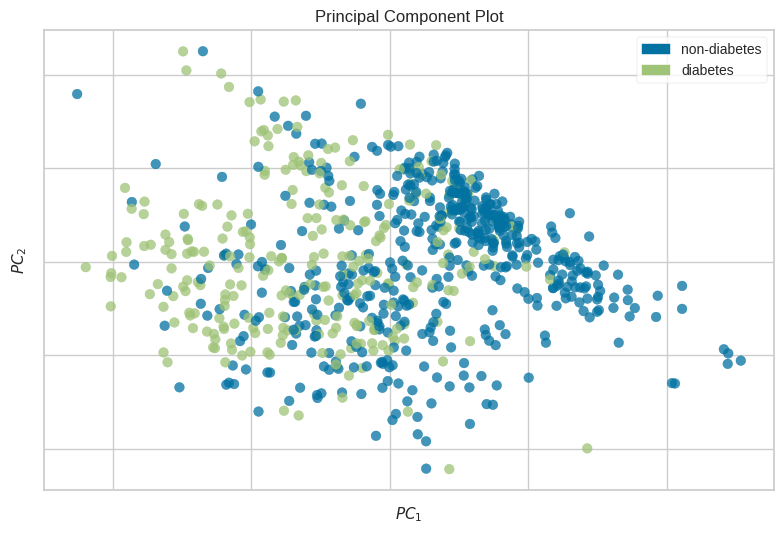

In [44]:
from yellowbrick.features import PCA


visualizer = PCA(scale=True, classes=classes)
visualizer.fit_transform(X, y)
visualizer.show()

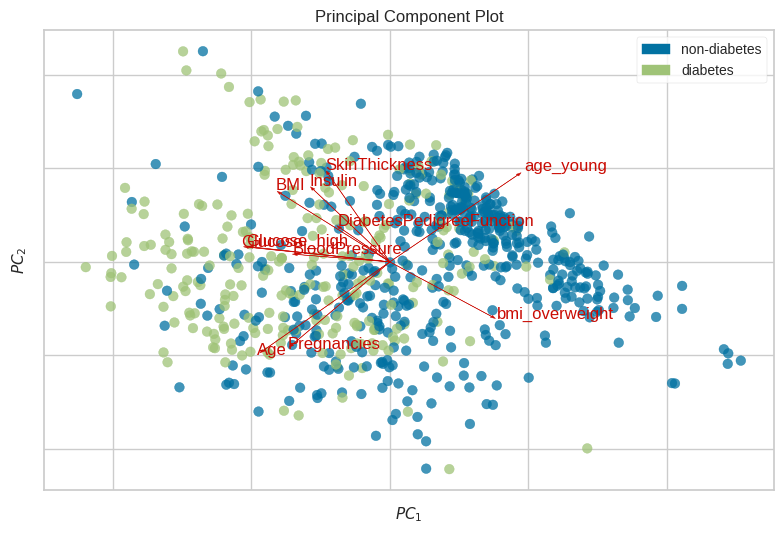

In [45]:
from yellowbrick.features import PCA

visualizer = PCA(scale=True, proj_features=True,classes=classes)
visualizer.fit_transform(X, y)
visualizer.show()

## Projection using Manifold

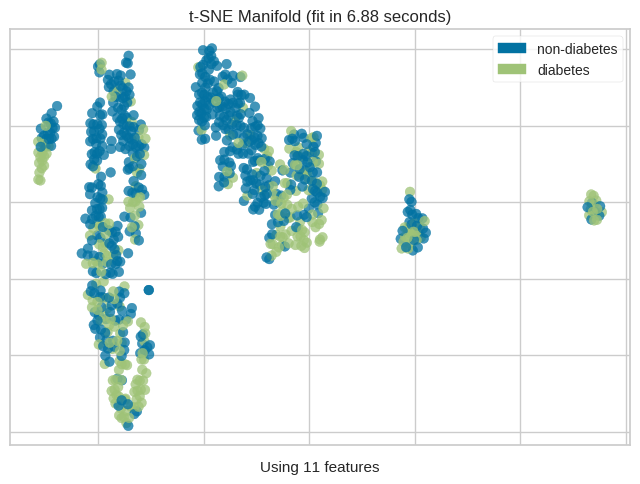

In [46]:
from yellowbrick.features import Manifold



# Instantiate the visualizer
viz = Manifold(manifold="tsne", classes=classes)

viz.fit_transform(X, y)  # Fit the data to the visualizer
viz.show()               # Finalize and render the figure


## Projection using TSNE

<Figure size 800x550 with 0 Axes>

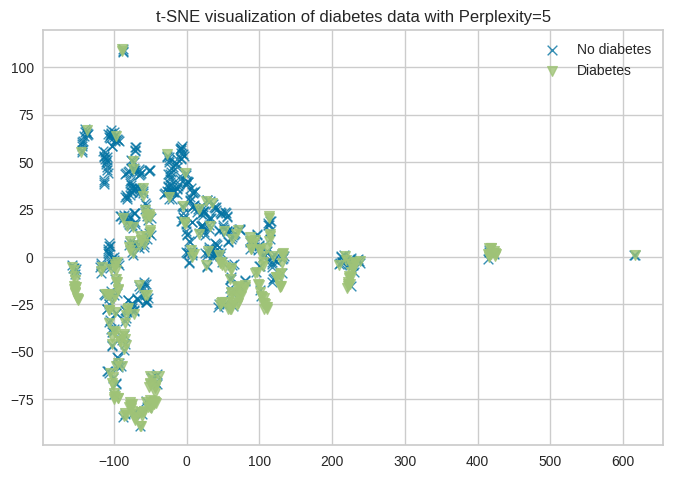

In [49]:
from sklearn import manifold
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler

tsne = manifold.TSNE(n_components=2, init='pca',
                     random_state=0, perplexity=5)
x_t = tsne.fit_transform(X)
color_map = {0:'green', 1:'blue'}
plt.figure()
plt.figure()
plt.scatter(x_t[np.where(y == 0), 0], x_t[np.where(y == 0), 1], marker='x', color='b', 
            linewidth='1', alpha=0.8, label='No diabetes')
plt.scatter(x_t[np.where(y == 1), 0], x_t[np.where(y == 1), 1], marker='v',color='g',
            linewidth='1', alpha=0.8, label='Diabetes')

plt.legend(loc='upper right')
plt.title('t-SNE visualization of diabetes data with Perplexity=%d' % 5)
plt.show()

<Figure size 800x550 with 0 Axes>

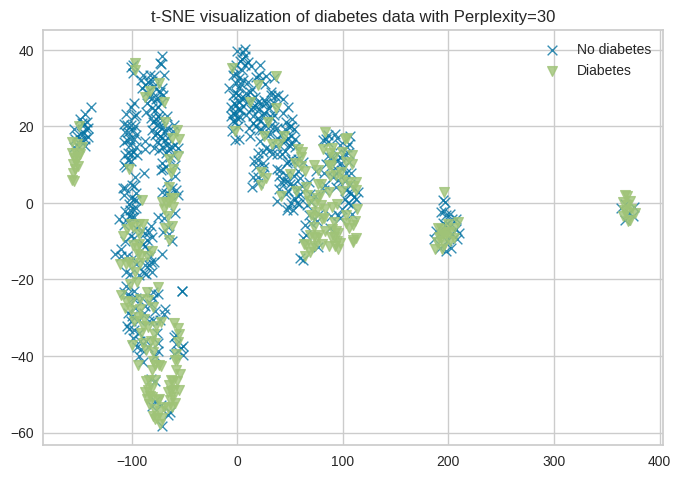

In [50]:
from sklearn import manifold
from matplotlib.ticker import NullFormatter
tsne = manifold.TSNE(n_components=2, init='pca',
                     random_state=0, perplexity=30)
x_t = tsne.fit_transform(X)
color_map = {0:'green', 1:'blue'}
plt.figure()
plt.figure()
plt.scatter(x_t[np.where(y == 0), 0], x_t[np.where(y == 0), 1], marker='x', color='b', 
            linewidth='1', alpha=0.8, label='No diabetes')
plt.scatter(x_t[np.where(y == 1), 0], x_t[np.where(y == 1), 1], marker='v',color='g',
            linewidth='1', alpha=0.8, label='Diabetes')

plt.legend(loc='upper right')
plt.title('t-SNE visualization of diabetes data with Perplexity=%d' % 30)
plt.show()

<Figure size 800x550 with 0 Axes>

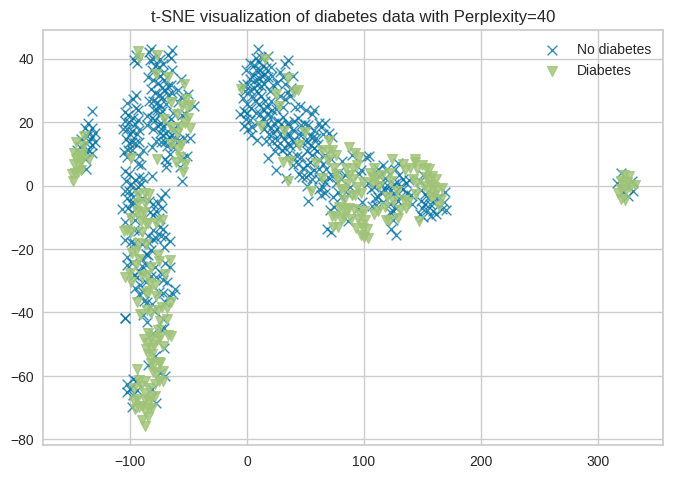

In [51]:
from sklearn import manifold
from matplotlib.ticker import NullFormatter
tsne = manifold.TSNE(n_components=2, init='pca',
                     random_state=0, perplexity=40)
x_t = tsne.fit_transform(X)
color_map = {0:'green', 1:'blue'}
plt.figure()
plt.figure()
plt.scatter(x_t[np.where(y == 0), 0], x_t[np.where(y == 0), 1], marker='x', color='b', 
            linewidth='1', alpha=0.8, label='No diabetes')
plt.scatter(x_t[np.where(y == 1), 0], x_t[np.where(y == 1), 1], marker='v',color='g',
            linewidth='1', alpha=0.8, label='Diabetes')

plt.legend(loc='upper right')
plt.title('t-SNE visualization of diabetes data with Perplexity=%d' % 40)
plt.show()

<Figure size 800x550 with 0 Axes>

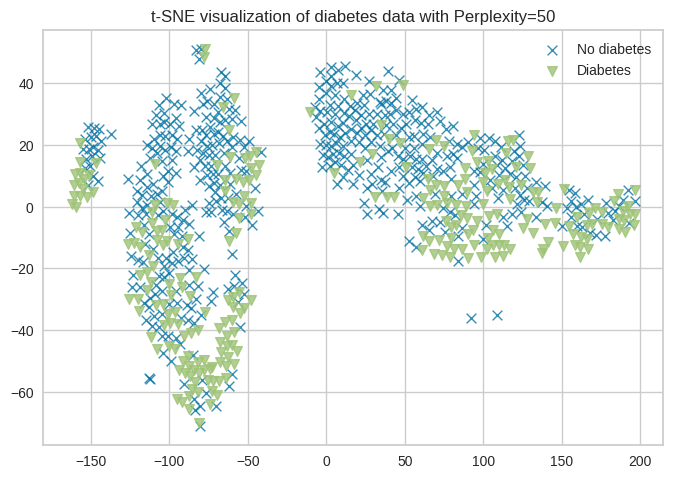

In [53]:
from sklearn import manifold
from matplotlib.ticker import NullFormatter
tsne = manifold.TSNE(n_components=2, init='pca',
                     random_state=0, perplexity=50)
x_t = tsne.fit_transform(X)
color_map = {0:'green', 1:'blue'}
plt.figure()
plt.figure()
plt.scatter(x_t[np.where(y == 0), 0], x_t[np.where(y == 0), 1], marker='x', color='b', 
            linewidth='1', alpha=0.8, label='No diabetes')
plt.scatter(x_t[np.where(y == 1), 0], x_t[np.where(y == 1), 1], marker='v',color='g',
            linewidth='1', alpha=0.8, label='Diabetes')

plt.legend(loc='upper right')
plt.title('t-SNE visualization of diabetes data with Perplexity=%d' % 50)
plt.show()

## Projection using Isomaps

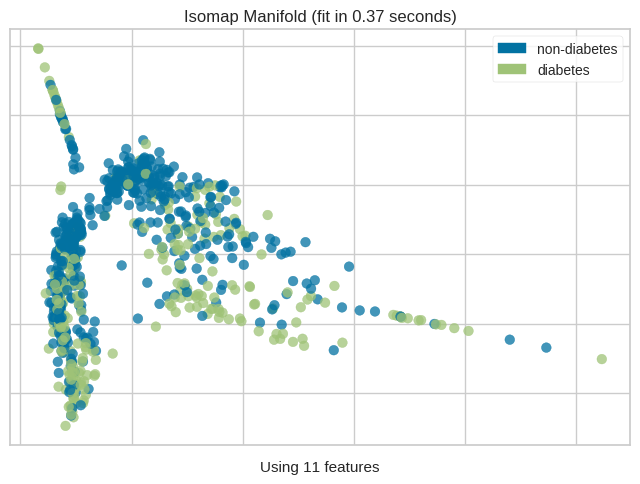

In [54]:
from yellowbrick.features import Manifold

# Instantiate the visualizer
viz = Manifold(manifold="isomap", n_neighbors=10, classes=classes)

viz.fit_transform(X, y)  # Fit the data to the visualizer
viz.show()               # Finalize and render the figure

## Projections using LLE

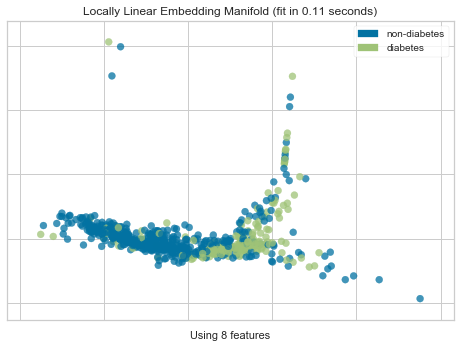

In [ ]:
from yellowbrick.features import Manifold

# Instantiate the visualizer
viz = Manifold(manifold="lle", n_neighbors=10, classes=classes)

viz.fit_transform(X, y)  # Fit the data to the visualizer
viz.show()               # Finalize and render the figure

## Projection using MDS

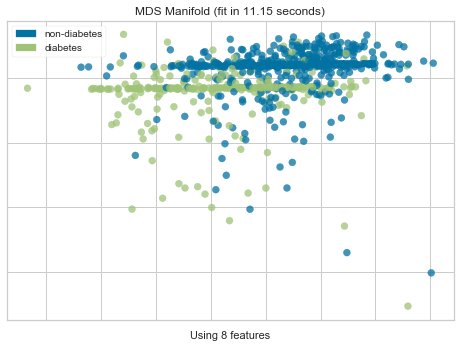

In [ ]:
from yellowbrick.features import Manifold

# Instantiate the visualizer
viz = Manifold(manifold="mds", n_neighbors=10, classes=classes)

viz.fit_transform(X, y)  # Fit the data to the visualizer
viz.show()               # Finalize and render the figure